# Advanced Presentation - PyGame! and random
- Group 3: Anishka Prakahs Tahiliani, Mathew Jerry Thomas, Andrew Kowalczewski
- 2020-11-03

![alt text](pygame.png "Title")

### What is PyGame?
#### A python module for writing video games.
Just turned 20 years old!!

In [25]:
# importing a library means these respective objects, functions, and methods are now available to use in your program.
# random came preinstalled. 
### downloaded from 1 or 2 places:
    # Anaconda package manager (conda) - Had Trouble unable to get to install with conda Install
    # PyPi package manager (pip)       - quickly installed no problem.
    # In the terminal or command prompt, type:  "pip install pygame" for a quick and easy install

import pygame
from random import randint

## We're going to make Pong - the original 1972 Arcade Game

- The original Pong game had zero lines of code! 
    - discrete logic chips

- It took us around 110 lines thanks to PyGame

![alt text](pong-game.png "Title")

### Setting Up the Pygame

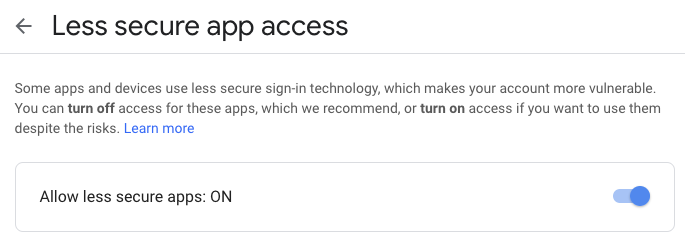

In [15]:
pygame.init() # initilize all imported pygame modules!!

(6, 0)

Set Colors and open the initial window

In [16]:
# Define some colors
BLACK = (0,0,0)
WHITE = (255,255,255)

# Open a new window
size = (700, 500)
screen = pygame.display.set_mode(size)
pygame.display.set_caption("Pong")

### Set up the sprites!!
Balls and Paddles need to be created with classes to ensure their smooth functioning.


In [ ]:
# Do not run this.. we have to first set up our class: Paddle

error! # just to prevent this block from running

paddleA = Paddle(WHITE, 10, 100) # Input color and size for PaddleA to create the PaddleA Object!!
paddleA.rect.x = 20 # starting on the left side, 
paddleA.rect.y = 200 # roughly halfway up of our 700x500 initialized window!

paddleB = Paddle(WHITE, 10, 100)# Input color and size for PaddleB to create the PaddleB Object!!
paddleB.rect.x = 670 # Set very near the right side's limit of 700 pixels. 
paddleB.rect.y = 200# roughly halfway up!

ball = Ball(WHITE,10,10) # the color and size of our 10x10 ball
ball.rect.x = 345 # initial x
ball.rect.y = 195 # initial y

### Create a Class for Paddle Sprites

In [17]:
# Creating a class/module for paddle's and how they move by defining their init constructor 
# and defining functions for their movement.
class Paddle(pygame.sprite.Sprite): 
    #This class represents a car/paddle. It derives from the "Sprite" class in Pygame.
    # it lets us create our first objects - paddleA & paddleB and define their characteristics

    def __init__(self, color, width, height): # 
        # Call the parent class (Sprite) constructor 
          # This lets us initilize the main properties of our object - size.. color.. 
        super().__init__()

        # Pass in the color of the car, and its x and y position, width and height.
        # Set the background color and set it to be transparent
        self.image = pygame.Surface([width, height]) # passed in 10 and 100 for width and height
        self.image.fill(BLACK)
        self.image.set_colorkey(BLACK)

        # Draw the paddle (a rectangle!)
        pygame.draw.rect(self.image, color, [0, 0, width, height])

        # Fetch the rectangle object that has the dimensions of the image.
        self.rect = self.image.get_rect()
        


    def moveUp(self, pixels): # takes two arguements, self, which is implicit and referts to the refered to object 
        #                     #  and pixels, which is the number of pixels to move the object, this is set to 5 and connected to the keystroke in our main game's loop!
        self.rect.y -= pixels # so move up moves it -5 pixels, makes sense because y is set from the top with 0 being the max top.
        #Check that you are not going too far (off the screen)
        if self.rect.y < 0: #if you direct it to go below 0 or below the screen it resets it back to zero
          self.rect.y = 0 # feels backwards but we cant go below zero, and therefore cant go any higher

    def moveDown(self, pixels): # same as up, but reversed for Down, 
        self.rect.y += pixels # adds five pixels to get to the lower range at 500 which is teh bottom. 
        #Check that you are not going too far (off the screen)
        if self.rect.y > 400: # if you set it to go above the screen it resets it back to 400
          self.rect.y = 400 # the screen dimension is 400 pixels and the padle was set to be 100 pixels, so this will be the the max for the paddle.

## Defining the ball's shape and size
  And how it moves, the ball is a sprite with coordinates and velocity during each frame of the game,
  
  ![alt text](velocity-vector.png "Title")

In [18]:
class Ball(pygame.sprite.Sprite):
    #This class represents a car. It derives from the "Sprite" class in Pygame.
    # it lets us create our first objects - paddleA & paddleB and defines 

    def __init__(self, color, width, height):
        # Call the parent class (Sprite) constructor
        super().__init__()

        # Pass in the color of the car, and its x and y position, width and height.
        # Set the background color and set it to be transparent
        self.image = pygame.Surface([width, height])
        self.image.fill(BLACK)
        self.image.set_colorkey(BLACK)

        # Draw the ball (a rectangle!)
        pygame.draw.rect(self.image, color, [0, 0, width, height])

        self.velocity = [randint(4,8),randint(-8,8)] # random initial ball speed 

        # Fetch the rectangle object that has the dimensions of the image.
        self.rect = self.image.get_rect()

    def update(self): # called in each frame, changes the (x,y) coordinates of the ball using only the velocity vector
        self.rect.x += self.velocity[0] # updates x by adding the velocity in the x direction
        self.rect.y += self.velocity[1] # updates the y position by adding it's velocity in the y direction

    def bounce(self): # used when it hits a paddle
        self.velocity[0] = -self.velocity[0] # Flips the x direction, changing it's x direction
        self.velocity[1] = randint(-8,8) # randomly choses a y velocity to adjust it's speed depending on the bounce!!!

### Inputting the Dimensions and Color for the paddles/ball for our Paddle Class
and setting where they will start - Now we can run this!

In [19]:
paddleA = Paddle(WHITE, 10, 100) # Input color and size for Paddle A
paddleA.rect.x = 20 # starting on the left side, 
paddleA.rect.y = 200 # roughly halfway up of our 700x500 initialized window!

paddleB = Paddle(WHITE, 10, 100)
paddleB.rect.x = 670 # Set very near the right side's limit of 700 pixels. 
paddleB.rect.y = 200# roughly halfway up!

ball = Ball(WHITE,10,10) # the color and size of our 10x10 ball
ball.rect.x = 345 # initial x
ball.rect.y = 195 # initial y

### Add all the sprites to a list!
Now that we created the classes and used them to create our objects we need to keep track of them

In [20]:
#This will be a list that will contain all the sprites we intend to use in our game.
all_sprites_list = pygame.sprite.Group()

# Add the car to the list of objects
all_sprites_list.add(paddleA)
all_sprites_list.add(paddleB)
all_sprites_list.add(ball)



### The Main Program Loop
 This is the key wrapper for the game, it is a loop in three main sections
 - Capture Events - Accepts User's inputs from the keyboard
 - Game Logic - Dictates what happens as the game runs - how the ball moves, score counts, and so on
 - Refresh teh screen by redrawing the "stage" and our controlled sprites
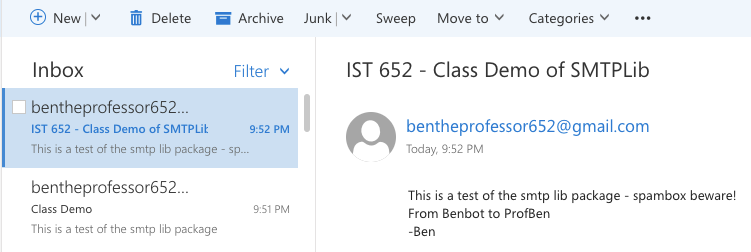

In [21]:
# The loop will carry on until the user exit the game (e.g. clicks the close button).
carryOn = True # Key for setting the games loop to stay in motion, listening to users. 

# The clock will be used to control how fast the screen updates
clock = pygame.time.Clock() # f

#Initialise player scores
scoreA = 0 # add to this for handicaps lol
scoreB = 0


In [26]:
# -------- Main Program Loop -----------

## THis is the while loop for keeping the game going. 
while carryOn:
    
    # --- Main event loop this is listening to stop the game - setting carryOn to false!
    
    for event in pygame.event.get(): # For input from the user.. always listening so long as Carry on is set to True as was initialy done.
        if event.type == pygame.QUIT: # If user clicks the X and closes out of the game
              carryOn = False # Breaks the while loop. 
        elif event.type==pygame.KEYDOWN:
                if event.key==pygame.K_x: #elif for an added escape from the game by closing the x key!
                     carryOn=False

                        
    #### Capture Events!! First loops.. that call on our paddles class.                    
    ## Controlling our paddles!!
    # Listening for user input from the keys
    
    
    #Moving the paddles when the use uses the arrow keys (player A) or "W/S" keys (player B)
    # Calls on the paddle class function's defined MoveUp and MoveDown
    keys = pygame.key.get_pressed()
    if keys[pygame.K_w]: # Sets the w key (K_w) as the moveUp function for PaddleA
        paddleA.moveUp(5)
    if keys[pygame.K_s]: # Sets the s key (K_s) as the moveDown function for PaddleA
        paddleA.moveDown(5)
    if keys[pygame.K_UP]: # Sets the Up key (K_s) as the moveUp function for PaddleB
        paddleB.moveUp(5)
    if keys[pygame.K_DOWN]:# Sets the Down key (K_s) as the moveDown function for PaddleB
        paddleB.moveDown(5)

    ## Game Logic!!!
    # What happens 
    all_sprites_list.update() # this refreshes the screen by updating all of our sprites! 
    
## Balls wal contact The bouncy ball algorithm!!
    #Check if the ball is bouncing against any of the 4 walls: 
    if ball.rect.x>=690: # ball hits the right wall
        scoreA+=1 #  # added to A's score
        ball.velocity[0] = -ball.velocity[0] # change the ball's velocity to head back in the opposite x direction!!
        
    if ball.rect.x<=0: # ball hits teh left wall
        scoreB+=1# updates B's score!
        ball.velocity[0] = -ball.velocity[0] # inverses teh balls velocity in teh x direction!
        
    # Ceiling or floor    
    if ball.rect.y>490:
        ball.velocity[1] = -ball.velocity[1] # if the ball hits the ceiling the y direction gets inverted.
    if ball.rect.y<0:
        ball.velocity[1] = -ball.velocity[1] # and again for teh floor

    #Detect collisions between the ball and the paddles: adding some more bounce!!
    # ~ COllISION DETECTION
    if pygame.sprite.collide_mask(ball, paddleA) or pygame.sprite.collide_mask(ball, paddleB): # if ball collides with paddleA or paddleB
      ball.bounce() # it does the bounce from class ball!! using a tool from pygame. 

    
## Drawing the court. 

    # Drawing the background and where teh scores are counted. 
    # First, clear the screen to black.
    screen.fill(BLACK) # Just a black screen 
    #Draw the net
    pygame.draw.line(screen, WHITE, [349, 0], [349, 500], 5) # jsut a white line across teh middle

    #Draws all the sprites on the screen, always updated based on position.  
    all_sprites_list.draw(screen) # draws the sprites on the screen from our all sprites list.. jsut the sprites

    #Display scores:
    font = pygame.font.Font(None, 74)
    text = font.render(str(scoreA), 1, WHITE) # draws the screen with A's score that is updated from when the ball hits any wall in the last 10 pixels. 
    screen.blit(text, (250,10)) # updates our text which is the score
    text = font.render(str(scoreB), 1, WHITE)
    screen.blit(text, (420,10))

    # --- Go ahead and update the screen with what we've drawn.
    pygame.display.flip() # updates the screen with the court and scores!  but not as sprites as those are drawn already in the frame

    # --- Limit to 60 frames per second
    clock.tick(60) # 60fps

#Once we have exited the main program's while loop we can stop the game engine
pygame.quit()  # hits quit!!!

### Other libraries you can use to make games??

### Python Game Libraries
- 2D scripting type libraries - not "pythonic"
    - Godot
    - Cocos2D
    - GameMakerStudio
- 3D graphic game libraries 
    - Pyglet
    - PyOpenGL
    - Panda3d
- Unreal Engine
    - Can now use python syntax in the open Unreal Engine 
    - Python Script Editor in the Unreal Editor
- New PyGame 2.0 Released 10/28/20!!
    - commemorating 20 years of PyGame
    - supports 3d!
    - Backwards compatible!
    - improved across the board for sound design, graphics, scaling, can translate low res up to 8k!
    - code cleanup and bugs removed!!
    - includes hints for code completion
    
    
    

### Additional Resources:
- https://www.pygame.org/
- https://realpython.com/pygame-a-primer/#basic-pygame-program
- https://www.101computing.net/getting-started-with-pygame/